### **1. 데이터 로딩**

In [387]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# scikit 관련 도구
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 로딩
train_data = pd.read_csv('/content/drive/MyDrive/머신러닝 실습/데이터/Social_Network_Ads.csv')

### **2. 데이터 전처리(preprocessing), Feature 추출**

In [388]:
# 입력 데이터 정규화 함수
def standardization(data):
  scaler = StandardScaler()                                                                                     # 정규화 객체 생성
  return scaler.fit_transform(data)                                                                             # 평균 0, 표준편차 1로 정규화된 데이터 반환

X = train_data[['Age', 'EstimatedSalary']].values                                                               # 특성 - 나이, 연봉
y = train_data['Purchased'].values                                                                              # 타겟 - 구매 여부

X = standardization(X)

### **3. 학습 데이터를 데이터의 80%(320개), 테스트 데이터를 20%(80개)로 분할 사용**

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)                   # 20%를 테스트셋으로 설정

print('X_train:', X_train.shape)
print('y_train:', y_train.shape, end = '\n\n')

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (320, 2)
y_train: (320,)

X_test: (80, 2)
y_test: (80,)


### **4.  학습데이터에 대해 로지스틱회귀 모델 구성**

In [390]:
# 시그모이드 함수
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# 예측 함수
# 확률값 0 ~ 1 반환
def predict(X, weights):
  z = np.dot(X, weights)                                                                                        # z = Xw
  z = np.clip(z, -500, 500)                                                                                     # 오버플로우 방지
  return sigmoid(z)

# 교차 엔트로피 손실 함수
def cross_entropy_loss(y_true, y_pred):
  epsilon = 1e-15                                                                                               # log(0) 계산 오류 방지
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)                                                                # y_pred가 0, 1 딱 맞게 나오지 않도록 보호
  return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 경사하강법 함수
def gradient_descent(X, y, lr, epochs):
  X_bias = np.hstack((np.ones((X.shape[0], 1)), X))                                                             # x0 = 1 편향 추가

  m, n = X_bias.shape
  weights = np.zeros(n)                                                                                         # 가중치 초기화
  cost_history = []                                                                                             # 매 epoch마다 손실값 기록

  for i in range(epochs + 1):
    y_pred = predict(X_bias, weights)                                                                           # 시그모이드 예측값 계산
    error = y_pred - y                                                                                          # 예측값과 실제값의 오차
    gradient = np.dot(X_bias.T, error) / m                                                                      # 기울기 계산
    weights -= lr * gradient                                                                                    # 가중치 업데이트

    cost = cross_entropy_loss(y, y_pred)                                                                        # 손실 계산
    cost_history.append(cost)

  y_class = (y_pred >= 0.5).astype(int)                                                                         # 특성 예측치를 0.5 기준으로 0과 1로 나누기
  acc = accuracy_score(y, y_class)                                                                              # 정확도 평가
  print(f"Learning Rate: {lr}, Epoch: {i}, Accuracy: {acc:.4f}, Cost: {cost:.4f}", end = '\n\n')

  return weights, cost_history

### **5. 경사하강법을 이용해서 모델 학습하고, 파라미터 값 출력**

Learning Rate: 0.01, Epoch: 1000, Accuracy: 0.8344, Cost: 130.4326

학습된 파라미터 (Train Data):
w0 = -0.6348396241145403
w1 = 1.1839567754079938
w2 = 0.7035074474476068



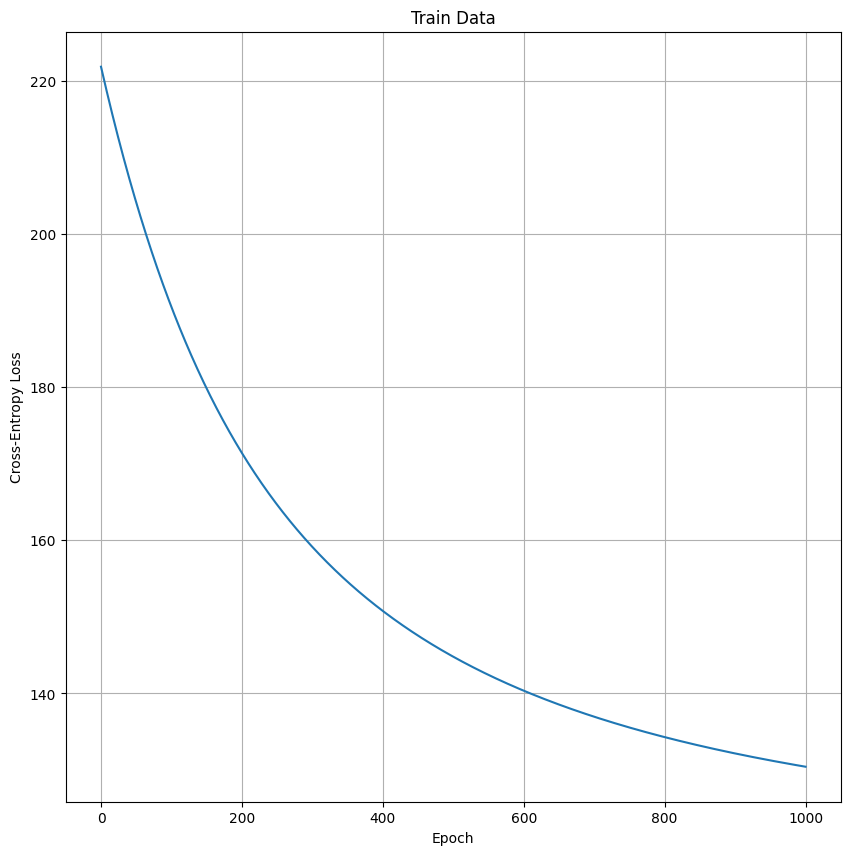

In [391]:
weights_train, cost_history_train = gradient_descent(X_train, y_train, lr = 0.01, epochs = 1000)

w0_train, w1_train, w2_train = weights_train
print("학습된 파라미터 (Train Data):")
print("w0 =", w0_train)
print("w1 =", w1_train)
print("w2 =", w2_train, end = '\n\n')

plt.figure(figsize = (10, 10))
plt.plot(cost_history_train)
plt.title("Train Data")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()

Learning Rate: 0.01, Epoch: 1000, Accuracy: 0.9500, Cost: 22.5618

학습된 파라미터 (Test Data):
w0 = -0.6081953320667974
w1 = 1.6215591879310083
w2 = 0.48963030880858144



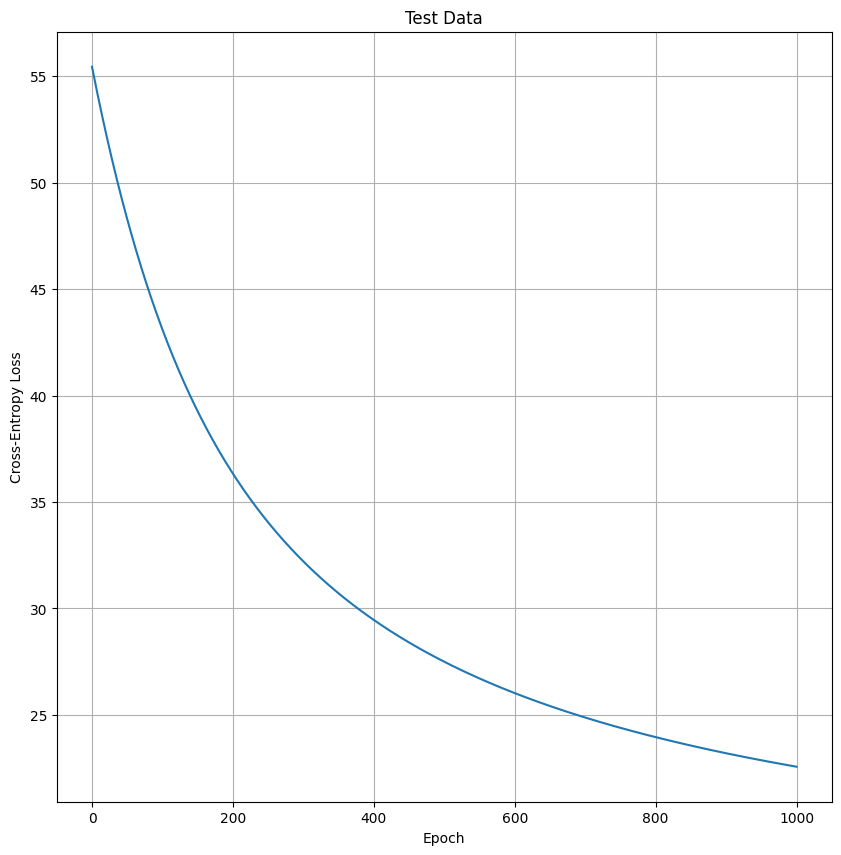

In [392]:
weights_test, cost_history_test = gradient_descent(X_test, y_test, lr = 0.01, epochs = 1000)

w0_test, w1_test, w2_test = weights_test
print("학습된 파라미터 (Test Data):")
print("w0 =", w0_test)
print("w1 =", w1_test)
print("w2 =", w2_test, end = '\n\n')

plt.figure(figsize = (10, 10))
plt.plot(cost_history_test)
plt.title("Test Data")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()

### **6. 모델의 시각화**

In [393]:
def plot_decision_boundary(X, y, weights, title):
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5                                                       # 0.5 패딩으로 여유 공간 추가
  x_values = np.linspace(x_min, x_max, 100)

  y_values = -(weights[0] + weights[1] * x_values) / weights[2]                                                 # 결정 경계선 x2 계산

  plt.figure(figsize = (10, 10))
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'blue', label = 'Purchased 0')                                        # y가 0인 행 분류
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'green', label = 'Purchased 1')                                       # y가 1인 행 분류
  plt.plot(x_values, y_values, color = 'red', linestyle = '--', linewidth = '4', label = 'Decision Boundary')
  plt.xlabel('x1 (Standardized Age)')
  plt.ylabel('x2 (Standardized Salary)')
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()

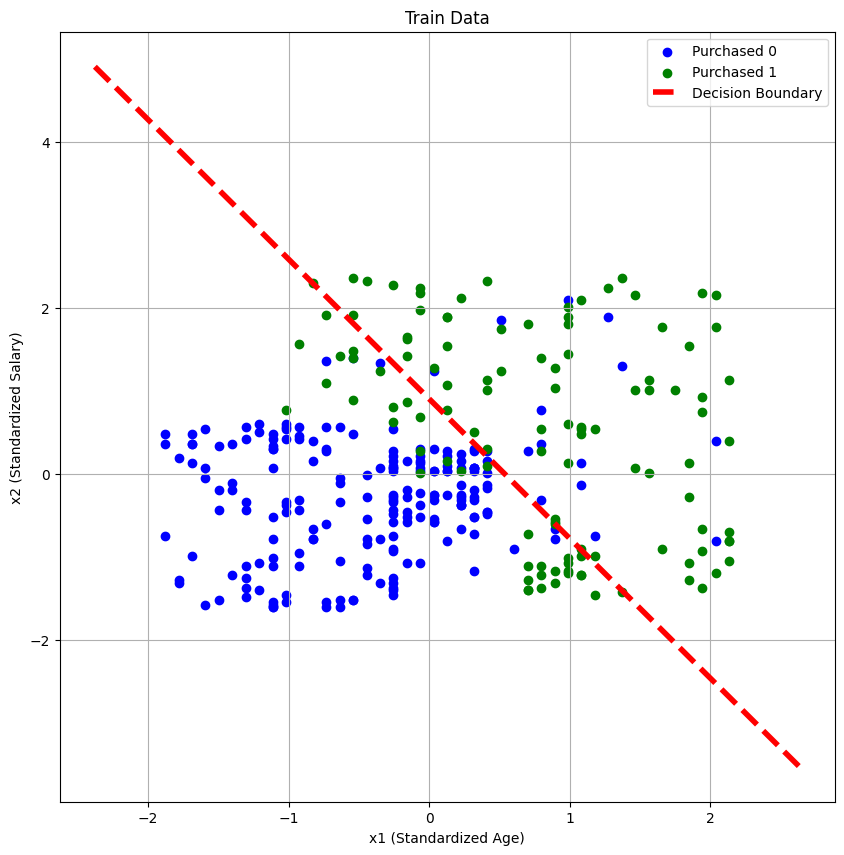

In [394]:
plot_decision_boundary(X_train, y_train, weights_train, "Train Data")

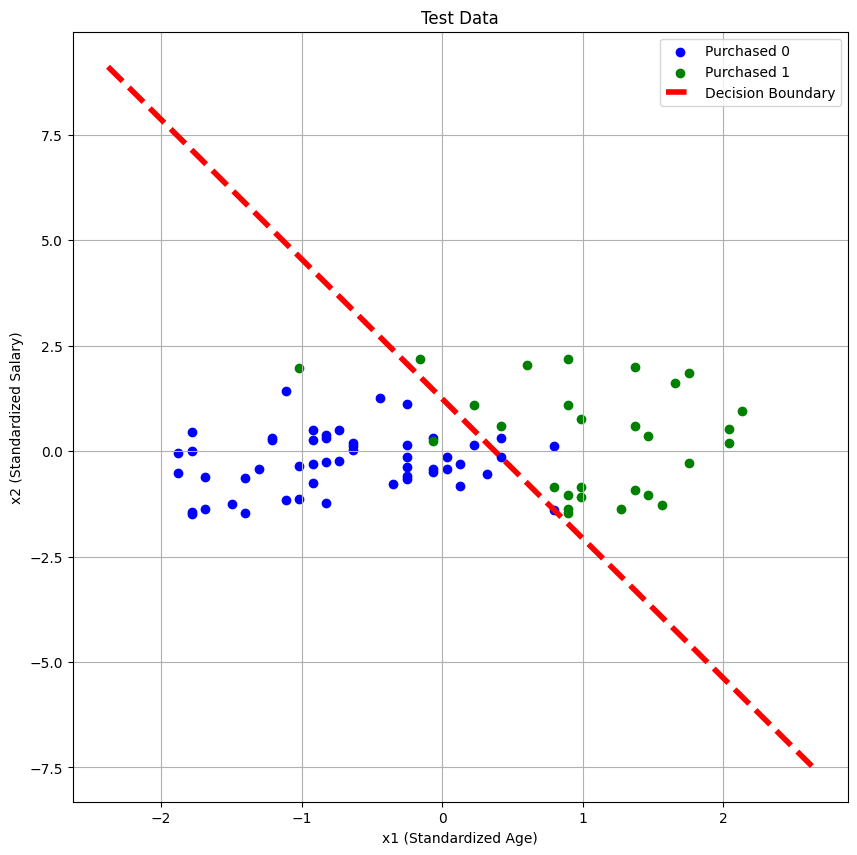

In [395]:
plot_decision_boundary(X_test, y_test, weights_test, "Test Data")

### **7. scikit-learn Library를 이용, 모델 학습하고, 파라미터 값 출력**

In [396]:
scikit_model_train = LogisticRegression()                                                                      # 로지스틱 회귀 인스턴스 생성
scikit_model_train.fit(X_train, y_train)                                                                       # 모델 훈련

# intercpet_ = [w0]
# coef_ = [[w1, w2]]
scikit_weights_train = np.hstack([scikit_model_train.intercept_, scikit_model_train.coef_[0]])

print("학습된 파라미터 (Train Data(scikit)):")
print("w0 =", scikit_weights_train[0])
print("w1 =", scikit_weights_train[1])
print("w2 =", scikit_weights_train[2])

학습된 파라미터 (Train Data(scikit)):
w0 = -1.0529134008675236
w1 = 2.0125384921084057
w2 = 1.1232209304946785


In [397]:
scikit_model_test = LogisticRegression()                                                                       # 로지스틱 회귀 인스턴스 생성
scikit_model_test.fit(X_test, y_test)                                                                          # 모델 훈련

# intercpet_ = [w0]
# coef_ = [[w1, w2]]
scikit_weights_test = np.hstack([scikit_model_test.intercept_, scikit_model_test.coef_[0]])

print("학습된 파라미터 (Test Data(scikit)):")
print("w0 =", scikit_weights_test[0])
print("w1 =", scikit_weights_test[1])
print("w2 =", scikit_weights_test[2])

학습된 파라미터 (Test Data(scikit)):
w0 = -1.0543950167319132
w1 = 2.5442162185892103
w2 = 0.8303210019039452


### **8. scikit-learn Library 모델 시각화**

Accuracy : 0.840625



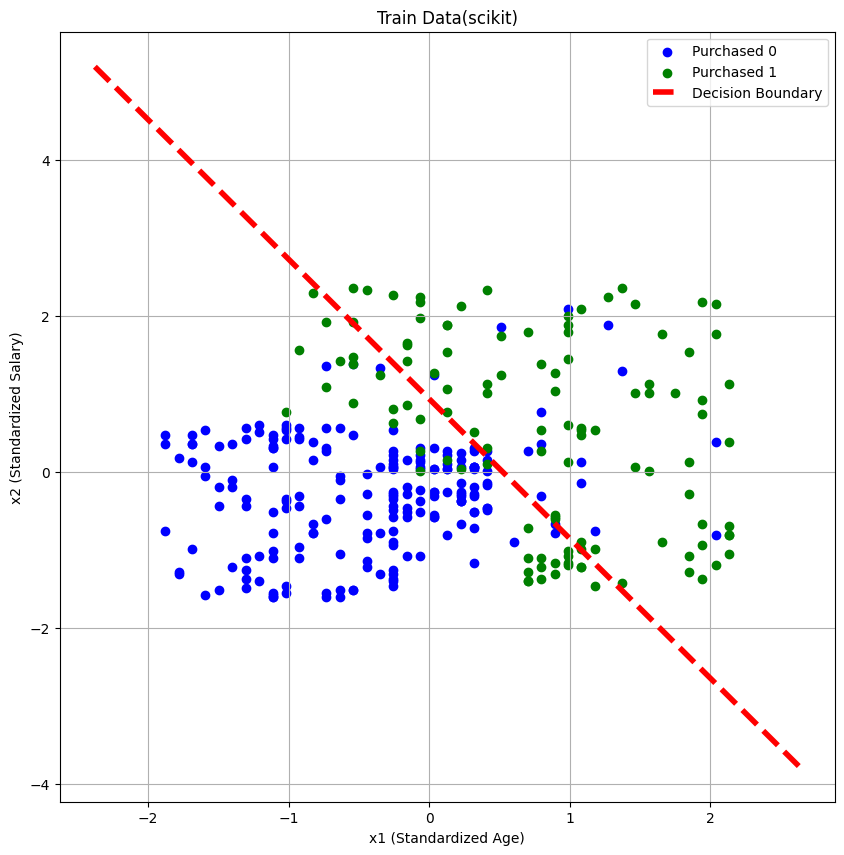

In [398]:
scikit_y_train_pred = scikit_model_train.predict(X_train)                                                      # 학습 모델로 클래스 예측, 0 또는 1 반환
scikit_train_result = accuracy_score(y_train, scikit_y_train_pred)                                             # 정확도 평가

print('Accuracy :', scikit_train_result, end = '\n\n')

plot_decision_boundary(X_train, y_train, scikit_weights_train, "Train Data(scikit)")

Accuracy : 0.95



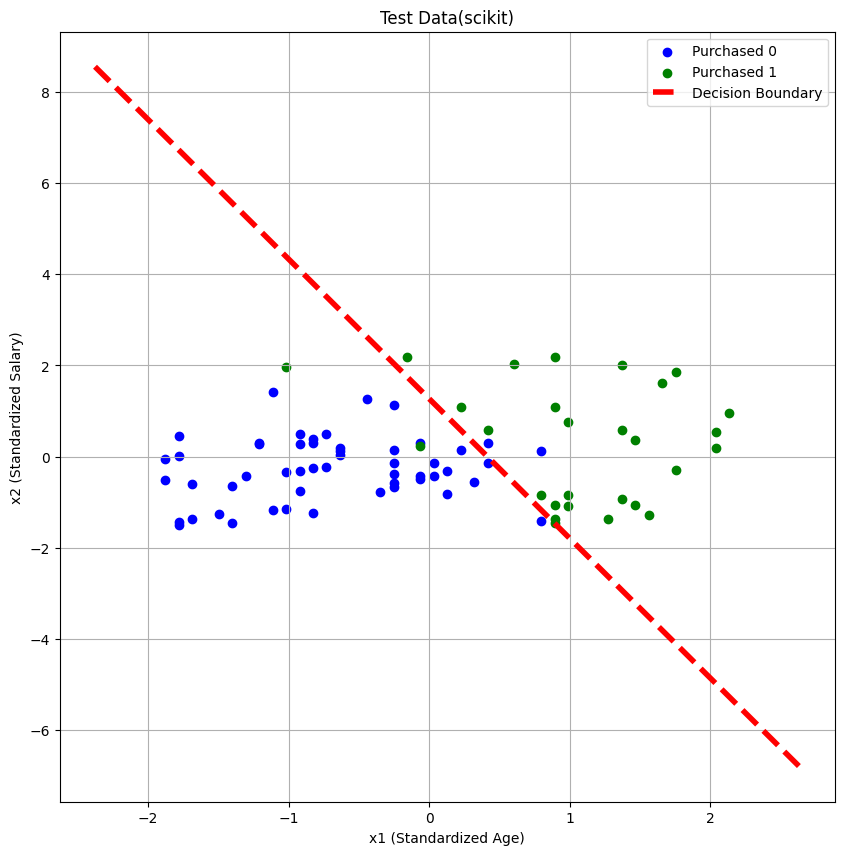

In [399]:
scikit_y_test_pred = scikit_model_test.predict(X_test)                                                         # 학습 모델로 클래스 예측, 0 또는 1 반환
scikit_test_result = accuracy_score(y_test, scikit_y_test_pred)                                                # 정확도 평가

print('Accuracy :', scikit_test_result, end = '\n\n')

plot_decision_boundary(X_test, y_test, scikit_weights_test, "Test Data(scikit)")